# Analisys

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sharks = pd.read_csv("data/sharks.csv")

## First hypothesis

***Shark attacks have decreased in the last 20 years.***

In [15]:
sharks.head() #check the Dataframe

,original_order,Year,Country,Activity,Age,Fatal_(Y/N),Month
0,6303.0,2018,USA,Paddling,57,N,Jun
1,6302.0,2018,USA,Standing,11,N,Jun
2,6301.0,2018,USA,Surfing,48,N,Jun
3,6300.0,2018,AUSTRALIA,Surfing,NaN,N,Jun
4,6299.0,2018,MEXICO,Free diving,NaN,N,Jun


In [16]:
plt.rcParams["figure.figsize"] = [12.0, 4.0] #change graphic settings

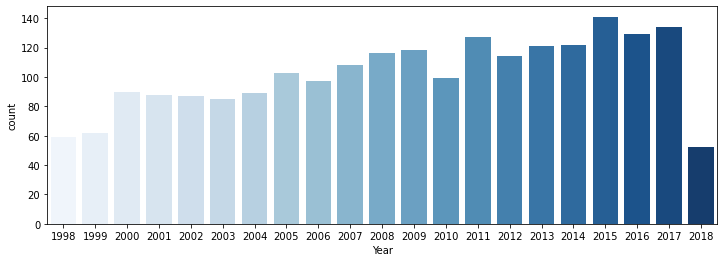

In [17]:
sns_1 = sns.countplot(data = sharks, x = "Year", palette = "Blues") 
#To test the hypothesis, we use the clean data to generate a countplot to see how many attacks occur each year. 
#In the DataFrame we can see that in 2018 there is a dip in attacks, that is because it stopped counting in the month of June. 
#So it is not significant.
#Otherwise, it seems that shark attacks, in general lines, are on the rise, they have practically doubled in these last 20 years.

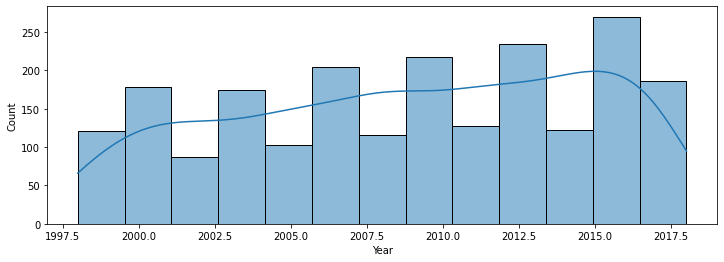

In [18]:
sns_2 = sns.histplot(data = sharks, x = "Year", kde=True)
#To see the increase more clearly, we see the line in this graph slowly increasing every year.

In [19]:
sharks["Year_range"] = pd.cut(sharks["Year"], bins=[1998, 2003, 2008, 2013, 2018])
#Next, we will put in 5-year containers to see if the increase is more visible.

In [20]:
sharks["Year_range"].value_counts()

(2008, 2013]    579
(2013, 2018]    578
(2003, 2008]    513
(1998, 2003]    412
Name: Year_range, dtype: int64

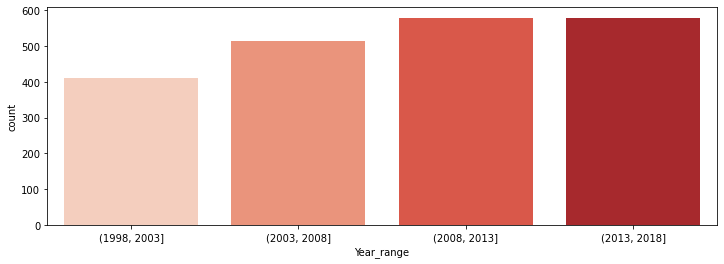

In [21]:
sns_3 = sns.countplot(data = sharks, x = "Year_range", palette = "Reds")
#With the following graph, we can see that from 1998 to 2008, that is, the first decade of our sample, 
#the increase every 5 years has been more pronounced than in the second decade. 
#In fact, in this decade we can see some stabilization.

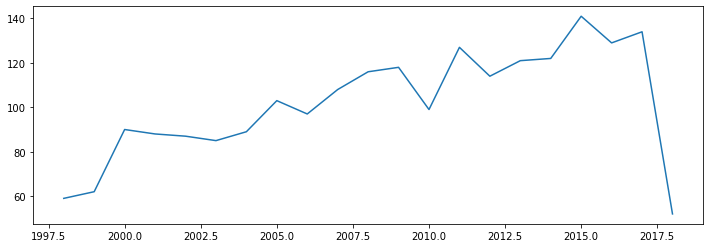

In [22]:
sns_4 = sharks["Year"].value_counts().sort_index().plot(kind="line")
#This graph also shows the increase in the number of attacks.

Finally, we have to *reject* the hypothesis that, in the last 20 years, **attacks have increased.**

## Second hypothesis

***Shark attacks occur more in the summer months.***

<AxesSubplot:xlabel='Month', ylabel='count'>

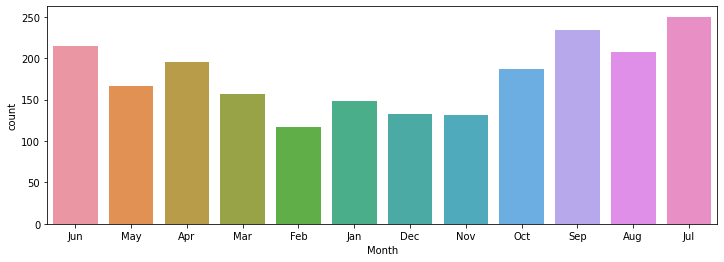

In [24]:
sns_5 = sns.countplot(data = sharks, x = "Month")
#It seems that most attacks take place from June to September, where they coincide with summer in northern hemisphere countries. The number of attacks decreases in the northern winter. 
#But will this also happen in southern hemisphere countries?

In [33]:
sharks_c = sharks["Country"].value_counts() #But, will it be the same in countries in other hemispheres?

In [34]:
sharks_c.iloc[:10] #select the first two, both of which are from different hemispheres.

USA              1057
AUSTRALIA         400
SOUTH AFRICA      159
BRAZIL             64
BAHAMAS            52
NEW ZEALAND        44
REUNION            34
NEW CALEDONIA      25
EGYPT              21
MEXICO             21
Name: Country, dtype: int64

In [35]:
sharks_c = sharks_c[sharks_c > 200].index #let's take the two first to compare

In [36]:
top_countries = sharks[sharks["Country"].isin(sharks_c)].copy()

In [37]:
top_countries.head() #check

,original_order,Year,Country,Activity,Age,Fatal_(Y/N),Month,Year_range
0,6303.0,2018,USA,Paddling,57,N,Jun,"(2013, 2018]"
1,6302.0,2018,USA,Standing,11,N,Jun,"(2013, 2018]"
2,6301.0,2018,USA,Surfing,48,N,Jun,"(2013, 2018]"
3,6300.0,2018,AUSTRALIA,Surfing,NaN,N,Jun,"(2013, 2018]"
5,6298.0,2018,AUSTRALIA,Kite surfing,NaN,N,Jun,"(2013, 2018]"


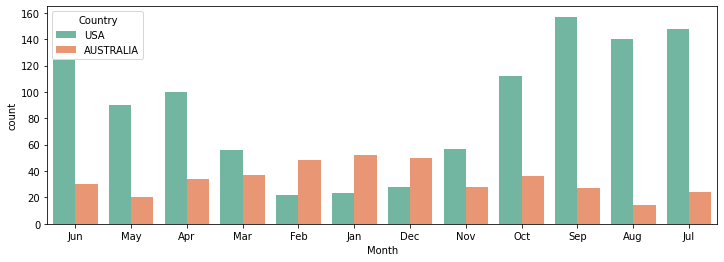

In [38]:
sns_6 = sns.countplot(data = top_countries, x = "Month", hue= "Country", palette = "Set2")
#The following graph compares the two countries with the highest number of attacks. 
#One (USA) in the northern hemisphere, where summer lasts from June to September, and the other (Australia)
#in the southern hemisphere, where summer lasts from approximately November to March. 
#As can be seen, this coincides with the graph, where the USA has more attacks in summer and Australia as well.

This hypothesis is confirmed at a general level, due to the fact that most cases occur in the USA, a country in the northern hemisphere, where the summer months coincide with Jun, Jul, Agu, Sep. However, in Australia, a country in the southern hemisphere and second in number of attacks, the months with the highest incidence are, curiously, Jan, Feb, Mar... the summer months in the southern hemisphere.

## Third hypothesis

***Surfing is the activity where most attacks occur***

In [42]:
sharks_c = sharks["Country"].value_counts() 
#we select again the countries with the most occurrences, but in this case, we are going to select the top 10.

In [43]:
sharks_c = sharks_c[sharks_c > 50].index

In [44]:
top_countries = sharks[sharks["Country"].isin(sharks_c)].copy()

In [45]:
top_countries.head()

,original_order,Year,Country,Activity,Age,Fatal_(Y/N),Month,Year_range
0,6303.0,2018,USA,Paddling,57,N,Jun,"(2013, 2018]"
1,6302.0,2018,USA,Standing,11,N,Jun,"(2013, 2018]"
2,6301.0,2018,USA,Surfing,48,N,Jun,"(2013, 2018]"
3,6300.0,2018,AUSTRALIA,Surfing,NaN,N,Jun,"(2013, 2018]"
5,6298.0,2018,AUSTRALIA,Kite surfing,NaN,N,Jun,"(2013, 2018]"


In [46]:
activities = sharks["Activity"].value_counts() #we perform the same method as before.

In [47]:
activities.iloc[:10]

Surfing          665
Swimming         285
Fishing          117
Spearfishing     111
Wading            79
Snorkeling        69
Body boarding     47
Diving            37
Standing          36
Scuba diving      35
Name: Activity, dtype: int64

In [48]:
activities = activities[activities > 70].index #select top 5 activities.

In [49]:
top_activities = top_countries[top_countries["Activity"].isin(activities)].copy()

In [50]:
top_activities

,original_order,Year,Country,Activity,Age,Fatal_(Y/N),Month,Year_range
2,6301.0,2018,USA,Surfing,48,N,Jun,"(2013.0, 2018.0]"
3,6300.0,2018,AUSTRALIA,Surfing,NaN,N,Jun,"(2013.0, 2018.0]"
6,6297.0,2018,BRAZIL,Swimming,18,Y,Jun,"(2013.0, 2018.0]"
7,6296.0,2018,USA,Fishing,52,N,May,"(2013.0, 2018.0]"
12,6291.0,2018,USA,Swimming,10,N,May,"(2013.0, 2018.0]"
...,...,...,...,...,...,...,...,...
2132,4106.0,1998,USA,Swimming,40,N,Mar,NaN
2135,4103.0,1998,USA,Swimming,NaN,N,Feb,NaN
2136,4102.0,1998,AUSTRALIA,Spearfishing,31,NaN,Jan,NaN
2138,4099.0,1998,SOUTH AFRICA,Surfing,21,N,Jan,NaN


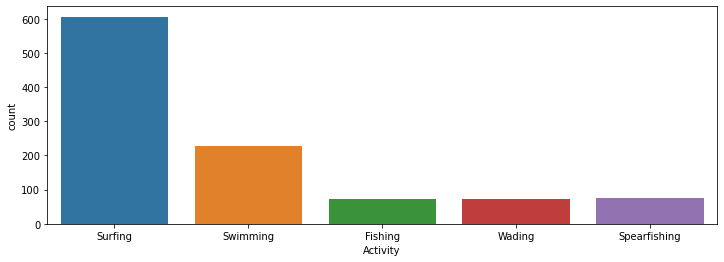

In [51]:
sns_7 = sns.countplot(data = top_activities, x = "Activity")
#As can be seen, surfing is the activity where most attacks are recorded. Followed by swimming.

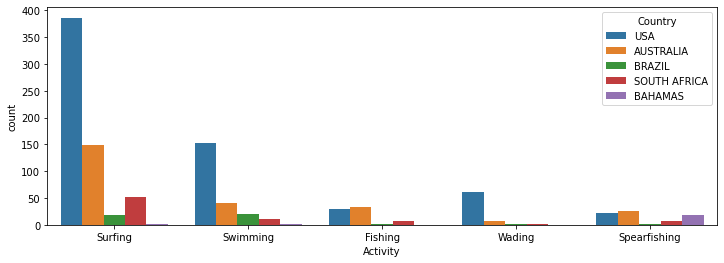

In [52]:
sns_8 = sns.countplot(data = top_activities, x = "Activity", hue = "Country")
#If we check the countries with the most attacks, we can see that surfing predominates in most of them.

We can *accept* the initial hypothesis, since, as we have seen, surfing is **the activity that collects the most attacks.**. This is probably because surfers spend a lot of time in the water, and from a shark's point of view, they look like a turtle, the main prey of many of these animals. But, is surfing the activity that records the most deaths?

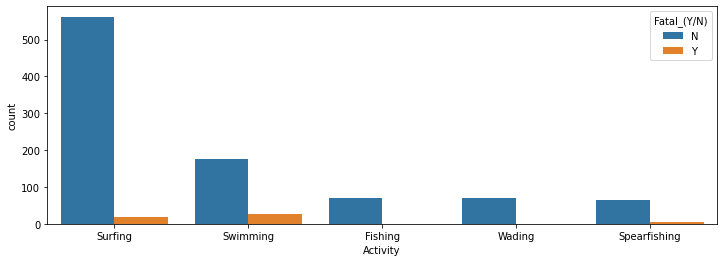

In [63]:
sns_9 = sns.countplot(data = top_activities, x = "Activity", hue = "Fatal_(Y/N)")
#One would think so, since the more attacks, the more deaths there should be.
#But, we see that this is not the case, the activity that leaves more deaths due to shark attacks is swimming.

In view of this, swimming is a very dangerous activity as well, since, although it has far fewer attacks than surfing, shark attacks are more deadly in the swimming activity. 
Therefore, even if we accept the hypothesis above, swimming can also be considered more dangerous, because there is less chance of attack, but also less chance of survival.

In [64]:
sns_1.figure.savefig("sns1.jpg", dpi=100) #save the figures

In [65]:
sns_2.figure.savefig("sns2.jpg", dpi=100)

In [66]:
sns_3.figure.savefig("sns3.jpg", dpi=100)

In [67]:
sns_4.figure.savefig("sns4.jpg", dpi=100)

In [68]:
sns_5.figure.savefig("sns5.jpg", dpi=100)

In [69]:
sns_6.figure.savefig("sns6.jpg", dpi=100)

In [70]:
sns_7.figure.savefig("sns7.jpg", dpi=100)

In [71]:
sns_8.figure.savefig("sns8.jpg", dpi=100)

In [72]:
sns_9.figure.savefig("sns9.jpg", dpi=100)